<a href="https://colab.research.google.com/github/singwang-cn/Hajimeteno_pr/blob/master/ex6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import random

In [4]:
iris_data = datasets.load_iris()

In [112]:
rand_sample1 = np.array([[random.uniform(-4,3), random.uniform(-4,4)] for i in range(100)]).T
rand_sample2 = np.array([[random.uniform(-3,4), random.uniform(-4,4)] for i in range(100)]).T
rand_sample3 = np.array([[random.uniform(-4,4), random.uniform(-4,2)] for i in range(100)]).T
rand_sample = np.concatenate((rand_sample1,rand_sample2,rand_sample3),axis=1)
rand_target = np.concatenate((np.zeros(100),np.zeros(100)+1.0,np.zeros(100)+2.0),axis=0)

In [114]:
max(rand_target)

2.0

In [148]:
class linear_normal_equation():

  def train(self, x, t):
    self.X = np.matrix(x)
    t_onehot = []
    for i in t:
      tmp = np.zeros(int(max(t))+1)
      tmp[int(i)] = 1
      t_onehot.append(tmp)
    self.T = np.matrix(t_onehot)
    self.W = (self.X * self.X.T).I * self.X * self.T
  def recognize(self, x):
    self.x = np.matrix(x)
    Y = self.x * self.W
    return np.argmax(Y, axis=1)

In [149]:
lne = linear_normal_equation()

In [150]:
lne.train(rand_sample, rand_target)

In [157]:
lne.recognize(rand_sample.T[65])

matrix([[1]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: No contour levels were found within the data range.
  # This is added back by InteractiveShellApp.init_path()


<a list of 1 text.Text objects>

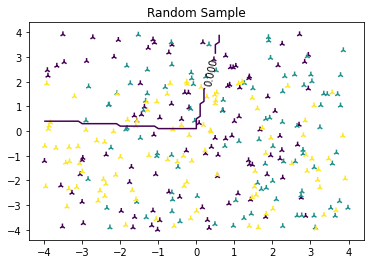

In [159]:
plt.title("Random Sample")
plt.xlim(-4.4, 4.4)
plt.ylim(-4.4, 4.4)
plt.scatter(rand_sample[0], rand_sample[1], c=rand_target, marker='2')
x = np.arange(-4, 4, 0.1)
y = np.arange(-4, 4, 0.1)
z = np.empty((len(x),len(y)),dtype='float')
for i in range(len(y)):
  for j in range(len(x)):
    z[i][j] = lne.recognize(np.array([x[j],y[i]]))
contour = plt.contour(x, y, z, [0])
plt.clabel(contour, colors=('k'))